In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
file_path = '/content/IRIS.csv'
iris_data = pd.read_csv(file_path)

# Step 3: Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(iris_data.head())

# Step 4: Display dataset information
print("\nDataset Information:")
print(iris_data.info())

# Step 5: Display summary statistics
print("\nSummary Statistics:")
print(iris_data.describe())


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal_length  sepal_width  petal_length  peta

In [ ]:
# Step 1: Check for duplicates
print(f"Number of duplicate rows before cleaning: {iris_data.duplicated().sum()}")

# Step 2: Remove duplicates
iris_data_cleaned = iris_data.drop_duplicates()

# Step 3: Verify duplicates are removed
print(f"Number of duplicate rows after cleaning: {iris_data_cleaned.duplicated().sum()}")

# Step 4: Optional - Check for missing values
missing_values = iris_data_cleaned.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Step 5: Display the cleaned dataset summary
print("Summary statistics after cleaning:")
print(iris_data_cleaned.describe())


Number of duplicate rows before cleaning: 3
Number of duplicate rows after cleaning: 0
Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Summary statistics after cleaning:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Dataset Shape: (150, 5)

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal_length  sepal_w

<Figure size 1200x800 with 0 Axes>

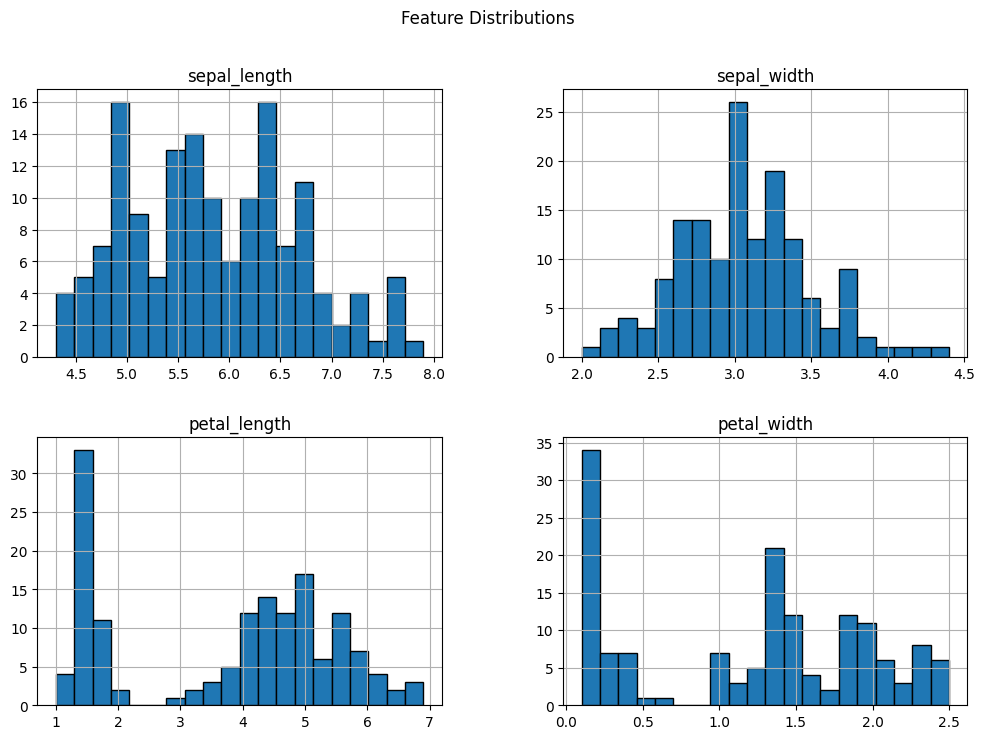


Pairplot of features:


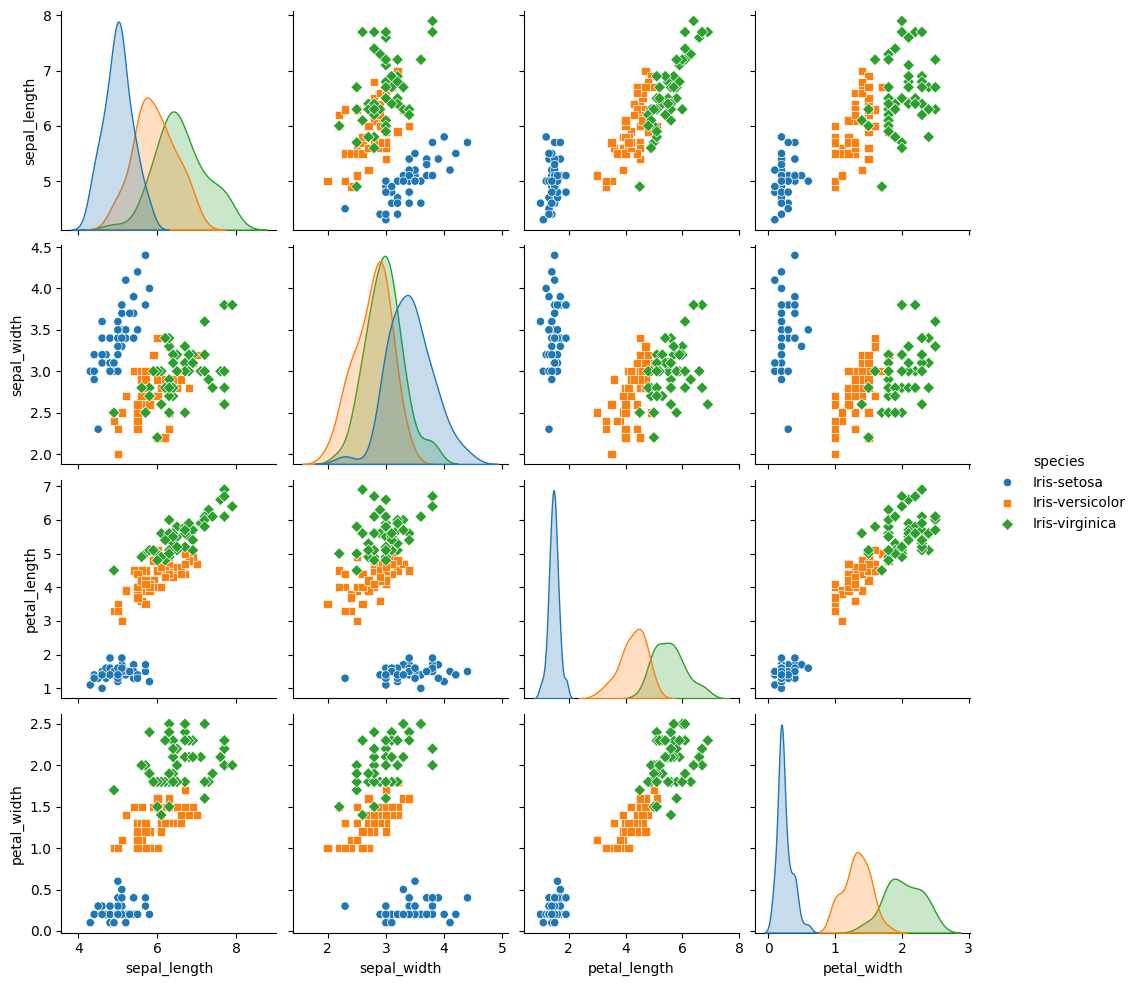

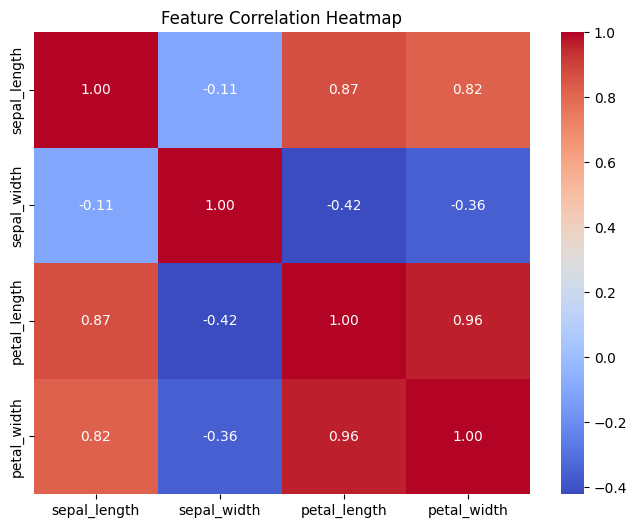

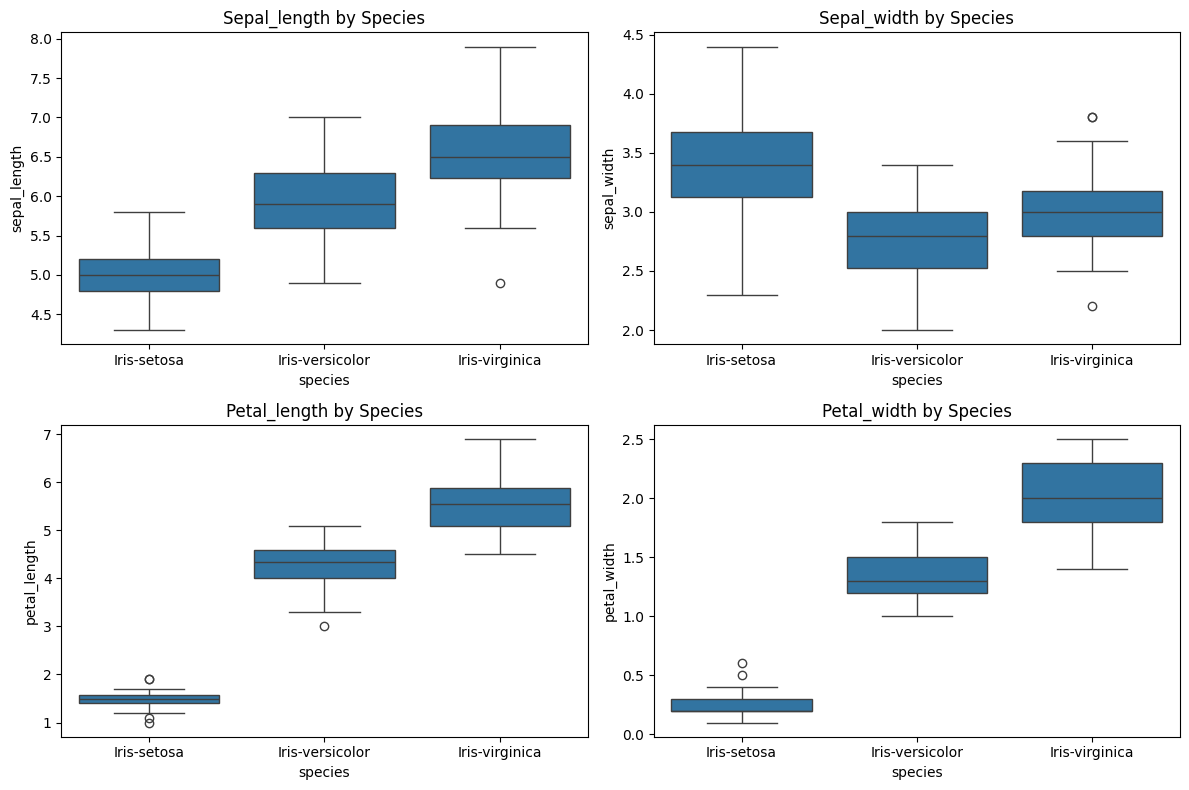

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/IRIS.csv'
iris_data = pd.read_csv(file_path)

# Step 2: Overview of the dataset
print("Dataset Shape:", iris_data.shape)
print("\nFirst 5 rows of the dataset:")
print(iris_data.head())

print("\nColumn Information:")
print(iris_data.info())

print("\nSummary Statistics:")
print(iris_data.describe())

print("\nNumber of unique species:")
print(iris_data['species'].value_counts())

# Step 3: Check for missing values
print("\nMissing Values in Each Column:")
print(iris_data.isnull().sum())

# Step 4: Visualizations
# Distribution of each feature
plt.figure(figsize=(12, 8))
iris_data.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Pairplot to visualize relationships
print("\nPairplot of features:")
sns.pairplot(iris_data, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
# Select only numerical features for correlation calculation
numerical_features = iris_data.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Boxplots for feature comparison by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_data)
    plt.title(f'{feature.capitalize()} by Species')
    plt.tight_layout()

plt.show()


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/IRIS.csv'
iris_data = pd.read_csv(file_path)

# Step 2: Remove duplicate rows
print(f"Number of duplicate rows before cleaning: {iris_data.duplicated().sum()}")
iris_data = iris_data.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {iris_data.duplicated().sum()}")

# Step 3: Encode the target column (species)
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Step 4: Split features (X) and target (y)
X = iris_data.drop('species', axis=1)  # Feature columns
y = iris_data['species']  # Target column

# Step 5: Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Display the processed data
print("\nProcessed Data Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Number of duplicate rows before cleaning: 3
Number of duplicate rows after cleaning: 0

Processed Data Shapes:
X_train: (117, 4), X_test: (30, 4)
y_train: (117,), y_test: (30,)


In [ ]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Define and train each model
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Step 3: Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print results
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Step 4: Compare Model Performance
print("Model Performance Summary:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


--- Logistic Regression ---
Accuracy: 0.93
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


--- Decision Tree ---
Accuracy: 0.93
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Mat

--- Logistic Regression ---
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


--- Decision Tree ---
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 

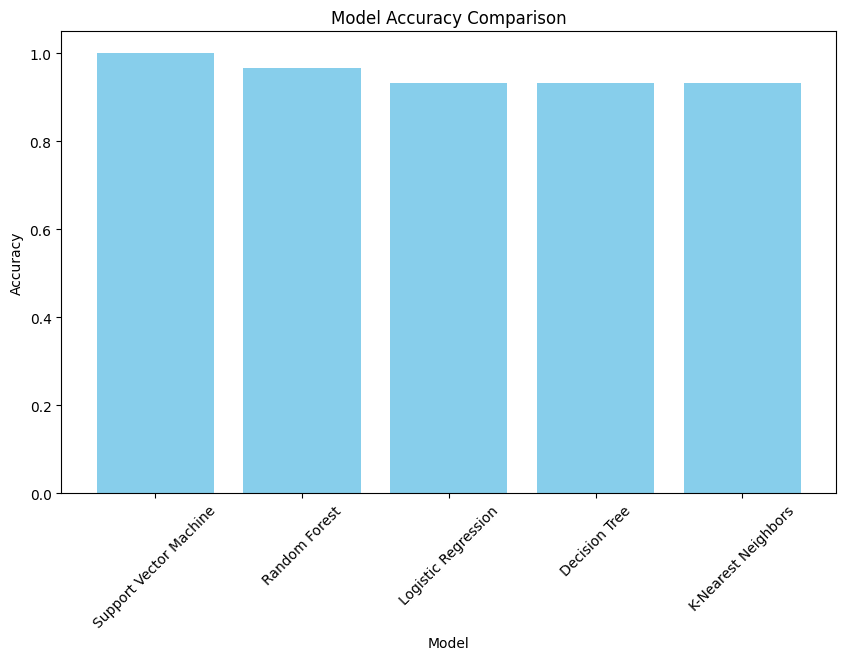

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 2: Define models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Step 3: Train and evaluate models
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Append results to metrics dictionary
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

    # Print classification report and confusion matrix
    print(f"--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Step 4: Create a comparison DataFrame
metrics_df = pd.DataFrame(metrics)

# Step 5: Sort by Accuracy and display the results
metrics_df = metrics_df.sort_values(by="Accuracy", ascending=False)
print("\n--- Model Comparison ---")
print(metrics_df)

# Step 6: Visualize the results (optional)
import matplotlib.pyplot as plt

# Plot accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Model"], metrics_df["Accuracy"], color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Define the model
svm = SVC(random_state=42)

# Define the hyperparameters to tune
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search for hyperparameter tuning
svm_grid = GridSearchCV(estimator=svm, param_grid=svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Best hyperparameters and accuracy
print("Best Hyperparameters for SVM:", svm_grid.best_params_)
print("Best Accuracy for SVM:", svm_grid.best_score_)

Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy for SVM: 0.9742753623188406


In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np # Import numpy

# Define the model
svm = SVC(random_state=42)

# Define the hyperparameters to sample
svm_params = {
    'C': np.logspace(-3, 3, 10),  # Values from 0.001 to 1000
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only applies to 'poly' kernel
}

# Randomized search for hyperparameter tuning
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=svm_params,
                                 n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Best hyperparameters and accuracy
print("Best Hyperparameters for SVM:", svm_random.best_params_)
print("Best Accuracy for SVM:", svm_random.best_score_)

Best Hyperparameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 2.154434690031882}
Best Accuracy for SVM: 0.9746376811594203


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



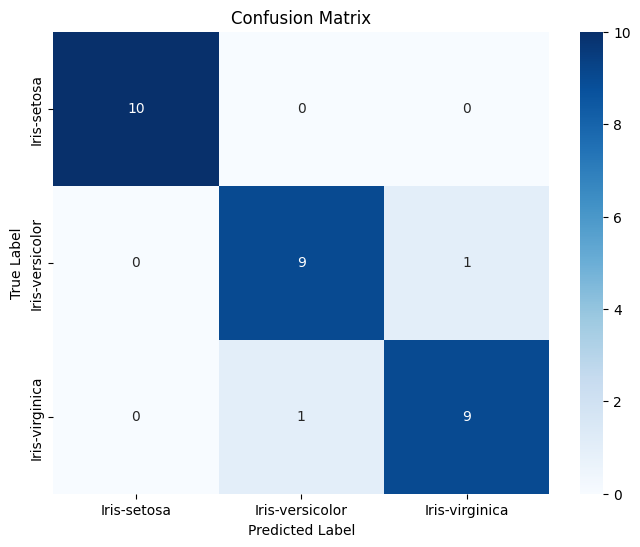


Model Evaluation Results:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, label_encoder):
    """
    Evaluate a trained model on the test data and print detailed evaluation metrics.

    Args:
        model: Trained model to evaluate.
        X_test: Test feature data.
        y_test: True labels for the test data.
        label_encoder: Encoder used to transform labels (for decoding and reporting).

    Returns:
        A dictionary of evaluation metrics.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    # Return the metrics as a dictionary
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Example Usage:
# Assuming `best_model` is the trained model (e.g., from RandomizedSearchCV) and `label_encoder` is used to transform the labels.
# Assign the best model from RandomizedSearchCV or GridSearchCV to 'best_model'
best_model = svm_random.best_estimator_

evaluation_results = evaluate_model(best_model, X_test, y_test, label_encoder)
# Print the evaluation results
print("\nModel Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.2f}")



Evaluating Logistic Regression...
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



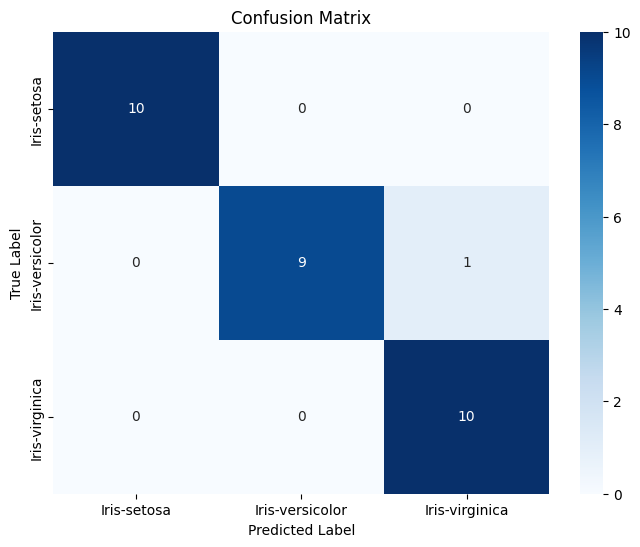


Evaluating K-Nearest Neighbors...
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



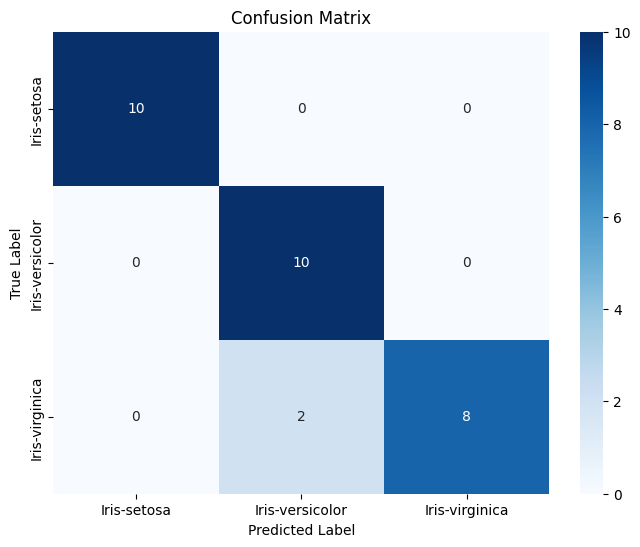


Evaluating Random Forest...
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



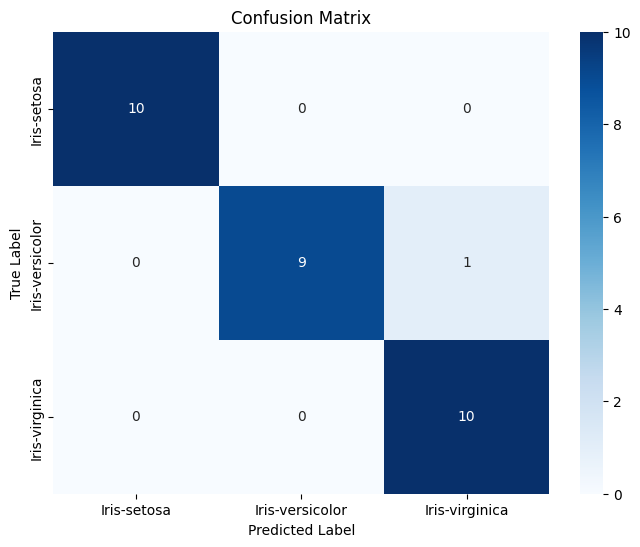


Evaluating Support Vector Machine...
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



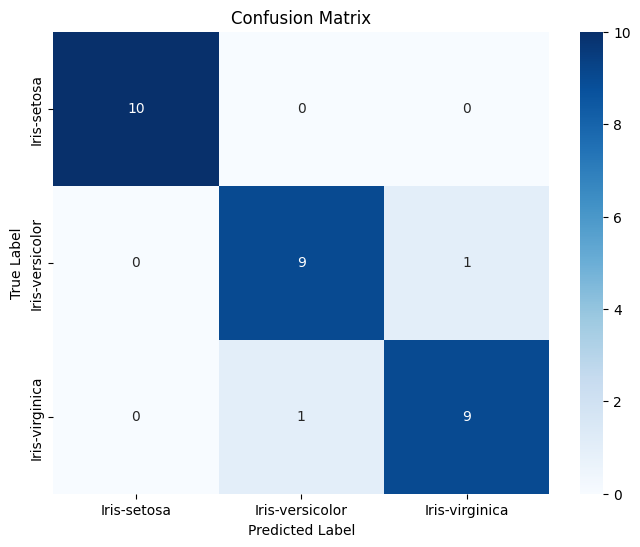


Model Comparison Summary:

Logistic Regression:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

K-Nearest Neighbors:
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1-Score: 0.93

Random Forest:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

Support Vector Machine:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np  # Import numpy
from sklearn.linear_model import LogisticRegression # Import for Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # Import for KNN
from sklearn.ensemble import RandomForestClassifier # Import for Random Forest

# ... (Your existing code) ...

# Define the Logistic Regression model and hyperparameter space for RandomizedSearchCV
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg_params = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform RandomizedSearchCV for Logistic Regression
log_reg_random = RandomizedSearchCV(estimator=log_reg, param_distributions=log_reg_params,
                                    n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
log_reg_random.fit(X_train, y_train)

# Define the K-Nearest Neighbors model and hyperparameter space for RandomizedSearchCV
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': np.arange(1, 21),  # Explore neighbors from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform RandomizedSearchCV for K-Nearest Neighbors
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=knn_params,
                                 n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
knn_random.fit(X_train, y_train)


# Define the Random Forest model and hyperparameter space for RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params,
                                n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Example: Evaluating multiple models
models = {
    "Logistic Regression": log_reg_random.best_estimator_,
    "K-Nearest Neighbors": knn_random.best_estimator_, # Now knn_random is defined
    "Random Forest": rf_random.best_estimator_,       # Now rf_random is defined
    "Support Vector Machine": svm_random.best_estimator_
}
# ... rest of the existing code
evaluation_summary = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    metrics = evaluate_model(model, X_test, y_test, label_encoder)
    evaluation_summary[model_name] = metrics

# Print summary
print("\nModel Comparison Summary:")
for model_name, metrics in evaluation_summary.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

In [ ]:
import joblib

# Select the best model based on a metric (e.g., F1-Score or Accuracy)
best_model_name = max(evaluation_summary, key=lambda x: evaluation_summary[x]["F1-Score"])
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, "best_iris_model.pkl")
print(f"\nBest Model ({best_model_name}) saved as 'best_iris_model.pkl'.")



Best Model (Logistic Regression) saved as 'best_iris_model.pkl'.


In [ ]:
# Load the model
loaded_model = joblib.load("best_iris_model.pkl")

# Test the model on a single sample
sample_index = 0  # Change this to test different samples
sample = X_test[sample_index].reshape(1, -1)

# Use iloc to access by position instead of label
true_label = y_test.iloc[sample_index]

predicted_label = loaded_model.predict(sample)[0]
decoded_predicted_label = label_encoder.inverse_transform([predicted_label])[0]
decoded_true_label = label_encoder.inverse_transform([true_label])[0]

print(f"\nSample Prediction:")
print(f"True Label: {decoded_true_label}")
print(f"Predicted Label: {decoded_predicted_label}")


Sample Prediction:
True Label: Iris-versicolor
Predicted Label: Iris-versicolor


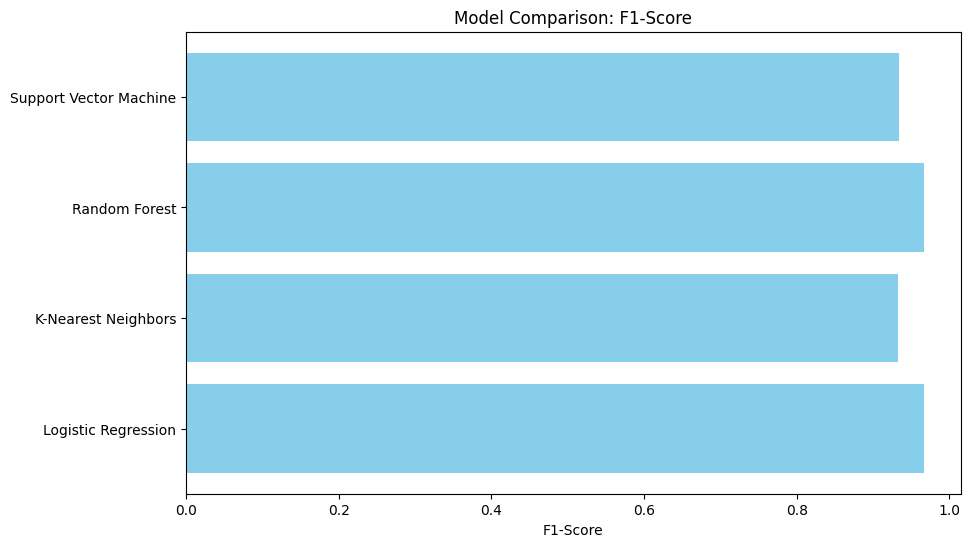

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for visualization
model_names = list(evaluation_summary.keys())
f1_scores = [evaluation_summary[model]["F1-Score"] for model in model_names]

# Plot F1-Score Comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, f1_scores, color="skyblue")
plt.xlabel("F1-Score")
plt.title("Model Comparison: F1-Score")
plt.show()
